# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
249012               2020-07-26           2020-07-22            2020-07-11   
249013               2020-07-26           2020-07-22            2020-07-11   
249014               2020-07-26           2020-07-20            2020-07-09   
249015               2020-07-26           2020-06-22            2020-06-11   
249016               2020-07-26           2020-07-13            2020-07-02   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
249012             2020-07-07 00:00:00                   NaT   
249013             2020-07-07 00:00:00                   NaT   
249014             2020-07-02 00:00:00                   NaT   
249015             2020-06-08 00:00:00            2020-07-26   
249016             2020-06-29 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación           Departamento  \
Id de caso                                                                  
1                         NaT          Bogotá d.c.            Bogotá D.C.   
2                         NaT  Guadalajara de buga        Valle del Cauca   
3                         NaT             Medellín              Antioquia   
4                         NaT             Medellín              Antioquia   
5                         NaT             Medellín              Antioquia   
...                       ...                  ...                    ...   
249012                    NaT              Ipiales                 Nariño   
249013                    NaT                Pasto                 Nariño   
249014                    NaT            Florencia                Caquetá   
249015                    NaT          Santa marta  Santa Marta D.T. y C.   
249016                    NaT             Riohacha             La Guajira   

           Severidad      Estado  ... Clasificación de edad Sexo  \
Id de caso                        ...                              
1               Leve  Recuperado  ...               10 - 20    F   
2               Leve  Recuperado  ...               30 - 40    M   
3               Leve  Recuperado  ...               40 - 50    F   
4               Leve  Recuperado  ...               50 - 60    M   
5               Leve  Recuperado  ...               20 - 30    M   
...              ...         ...  ...                   ...  ...   
249012          Leve        Casa  ...               50 - 60    M   
249013          Leve        Casa  ...                0 - 10    F   
249014          Leve        Casa  ...               20 - 30    M   
249015          Leve  Recuperado  ...               20 - 30    F   
249016          Leve        Casa  ...               60 - 70    F   

           Pertenecia Étnica Nombre Grupo Étnico         Tipo  \
Id de caso                                                      
1                       Otro                 NaN    Importado   
2                       Otro                 NaN    Importado   
3               

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1055   1448
Antioquia                                           10605  13538
Arauca                                                 38    143
Archipiélago de San Andrés Providencia y Santa ...     10     24
Atlántico                                            9799  11117
Barranquilla D.E.                                   12683  14840
Bogotá D.C.                                         41302  42911
Bolívar                                               946   1152
Boyacá                                                398    401
Buenaventura D.E.                                     753   1281
Caldas                                                356    356
Caquetá                                               297    288
Cartagena D.T. y C.                                  6525   8072
Casanare                                               95    125
Cauca                                                 669    889
Cesar                                                1081   1454
Chocó                                                1306   1514
Cundinamarca                                         3517   3604
Córdoba                                              1946   2036
Guainía                                                 6      8
Guaviare                                                9     68
Huila                                                 351    353
La Guajira                                            867    941
Magdalena                                             936    991
Meta                                                  570   1710
Nariño                                               3076   3722
Norte de Santander                                    658    923
Putumayo                                              289    355
Quindío                                               132    116
Risaralda                                             714    630
Santa Marta D.T. y C.                                1614   1721
Santander                                            1048   1610
Sucre                                                2445   2874
Tolima                                                706   1394
Valle del Cauca                                      9028  10474
Vaupés                                                 27     34
Vichada                                                 1      1

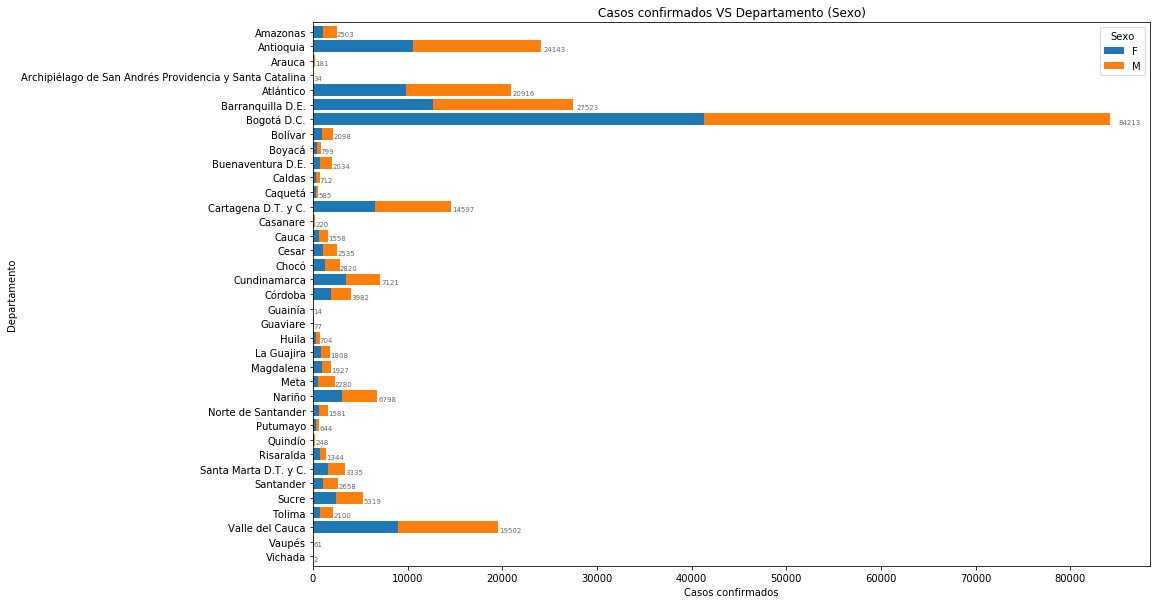

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      452      510   
Antioquia                                              834     1745     6434   
Arauca                                                   7       38       71   
Archipiélago de San Andrés Providencia y Santa ...       0        2        9   
Atlántico                                              912     1562     4556   
Barranquilla D.E.                                     1052     1734     6028   
Bogotá D.C.                                           3720     6463    19231   
Bolívar                                                 96      199      460   
Boyacá                                                  49       69      169   
Buenaventura D.E.                                       44      279      461   
Caldas                                                  26       44      162   
Caquetá                                                 15       36      182   
Cartagena D.T. y C.                                    611     1053     3348   
Casanare                                                11        9       63   
Cauca                                                   71      136      379   
Cesar                                                  179      235      602   
Chocó                                                  122      244      652   
Cundinamarca                                           352      517     1632   
Córdoba                                                139      199      810   
Guainía                                                  0        2        4   
Guaviare                                                 1       29       16   
Huila                                                   42       67      139   
La Guajira                                              98      179      397   
Magdalena                                              102      138      354   
Meta                                                    38      187      722   
Nariño                                                 321      596     1581   
Norte de Santander                                      53       68      370   
Putumayo                                                20       51      189   
Quindío                                                  8       14       44   
Risaralda                                               88      122      300   
Santa Marta D.T. y C.                                  130      230      734   
Santander                                               98      210      662   
Sucre                                                  221      392     1103   
Tolima                                                  86      126      665   
Valle del Cauca                                        677     1346     4435   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      339      273   
Antioquia                                              6076     3789     2803   
Arauca                                                   43       12        6   
Archipiélago de San Andrés Providencia y Santa ...       11        7        3   
Atlántico                                              4893     3317     2719   
Barranquilla D.E.                                      6546     4306     3707   
Bogotá D.C.                                           18474    13565    11446   
Bolívar                                                 489      303      190   
Boyacá                                                  151      124 

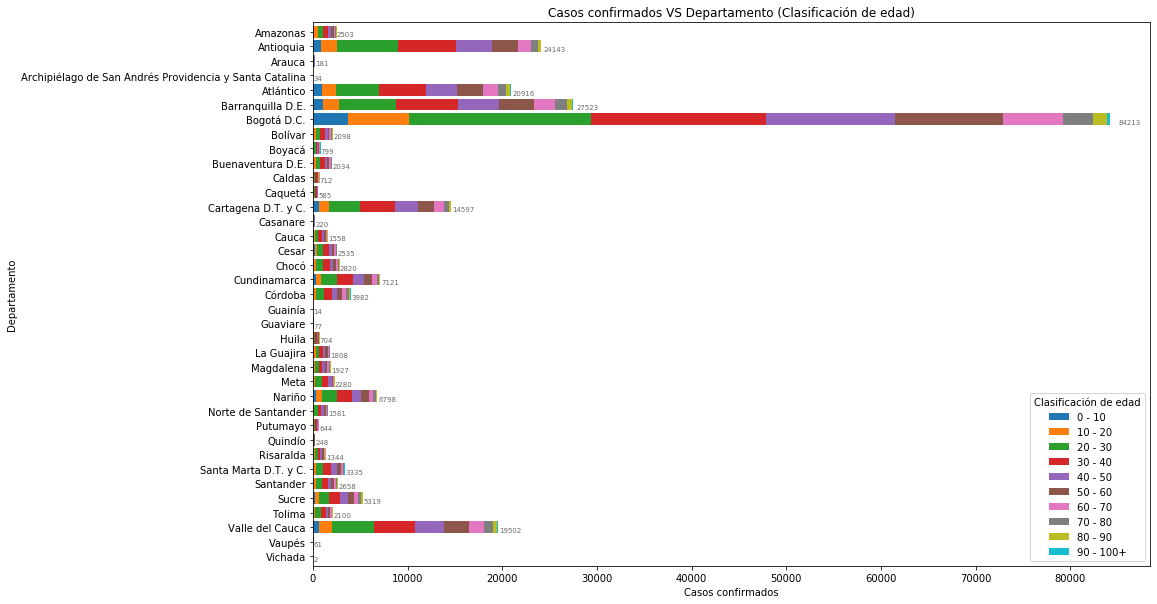

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               75.0      101.0   
Antioquia                                           15710.0      345.0   
Arauca                                                 47.0        1.0   
Archipiélago de San Andrés Providencia y Santa ...      4.0        0.0   
Atlántico                                            5324.0      980.0   
Barranquilla D.E.                                    6211.0     1414.0   
Bogotá D.C.                                         40886.0     2196.0   
Bolívar                                               670.0       97.0   
Boyacá                                                288.0       25.0   
Buenaventura D.E.                                     302.0      132.0   
Caldas                                                392.0        9.0   
Caquetá                                               436.0       10.0   
Cartagena D.T. y C.                                  3266.0      443.0   
Casanare                                               83.0        4.0   
Cauca                                                 737.0       48.0   
Cesar                                                 950.0       52.0   
Chocó                                                 645.0       92.0   
Cundinamarca                                         2858.0      176.0   
Córdoba                                              1839.0      464.0   
Guainía                                                 0.0        1.0   
Guaviare                                               27.0        0.0   
Huila                                                 270.0       18.0   
La Guajira                                            799.0      103.0   
Magdalena                                             585.0      183.0   
Meta                                                  669.0       29.0   
Nariño                                               2428.0      205.0   
Norte de Santander                                    959.0       65.0   
Putumayo                                              498.0       24.0   
Quindío                                                42.0        6.0   
Risaralda                                             612.0       25.0   
Santa Marta D.T. y C.                                1357.0      132.0   
Santander                                            1347.0       66.0   
Sucre                                                2246.0      336.0   
Tolima                                                734.0       38.0   
Valle del Cauca                                      6961.0      704.0   
Vaupés                                                 12.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                12.0           6.0   
Antioquia                                             1027.0         158.0   
Arauca                                                   7.0           2.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           0.0   
Atlántico                                              743.0         103.0   
Barranquilla D.E.                                      873.0          99.0   
Bogotá D.C.                                           4934.0         328.0   
Bolívar                                                119.0          10.0   
Boyacá                                                  56.0           7.0   
Buenaventura D.E.                                      118.0          27.0   
Caldas                                                  29.0           8.0   
Caquetá                                                 53.0           3.0   
Cartagena D.T. y C.  

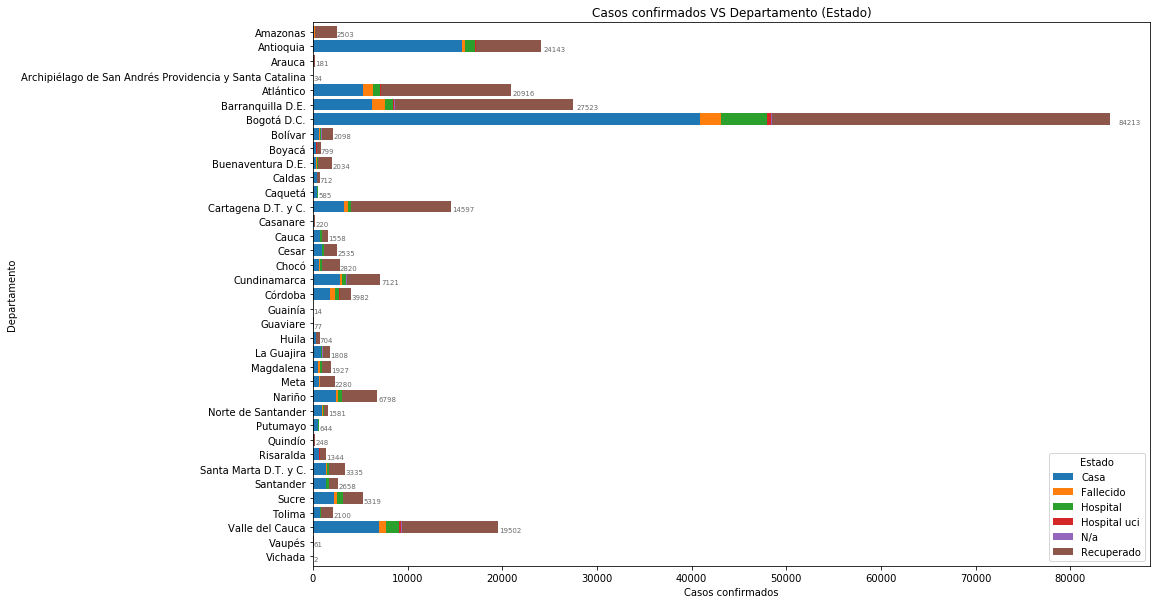

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          47811  52458
Fallecido      3125   5400
Hospital       5587   7512
Hospital uci    549    998
N/a             213    286
Recuperado    58573  66464

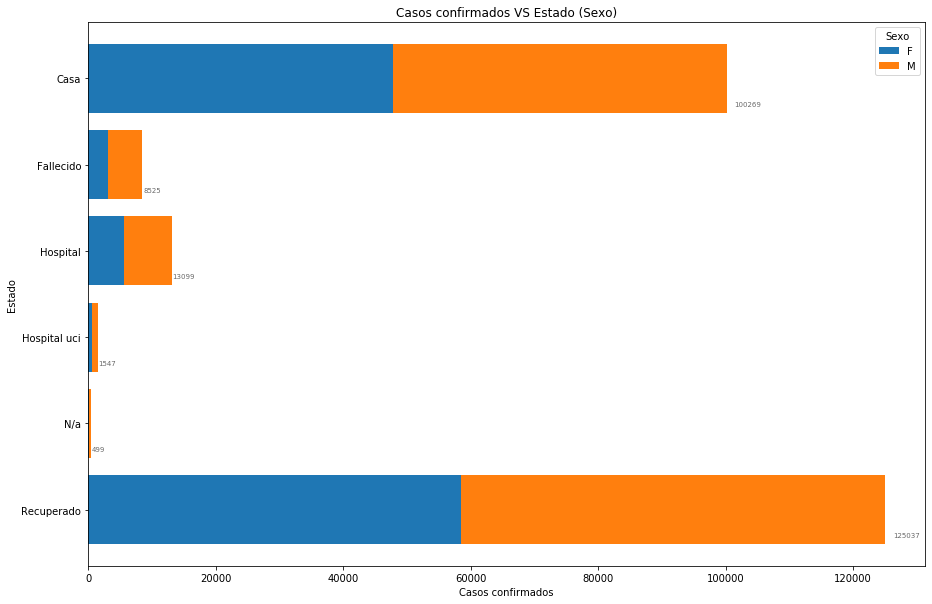

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3963     7661    25101    24980    16400    12422   
Fallecido                  14       18      126      298      693     1301   
Hospital                  506      287     1069     1686     2040     2741   
Hospital uci               63       27       53      166      219      371   
N/a                        14       10       22       21       39       60   
Recuperado               5800    10776    31122    30227    19677    14944   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      5955     2565     1053        169  
Fallecido                 1999     2138     1571        367  
Hospital                  2396     1520      748        106  
Hospital uci               351      215       77          5  
N/a                         94      111       99         29  
Recuperado                7600     3366     1311        214

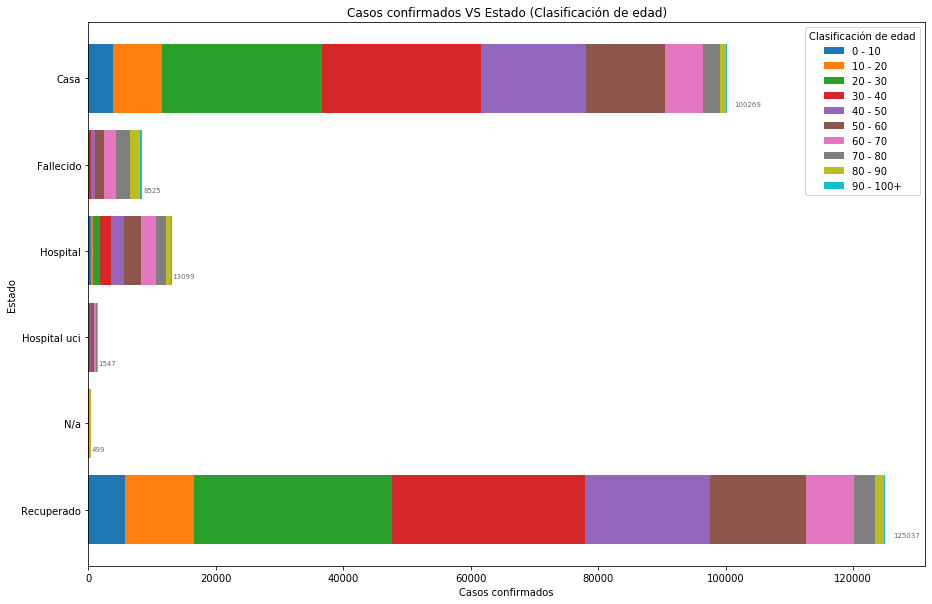

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   109556  119534
Importado       453     517
Relacionado    5849   13067

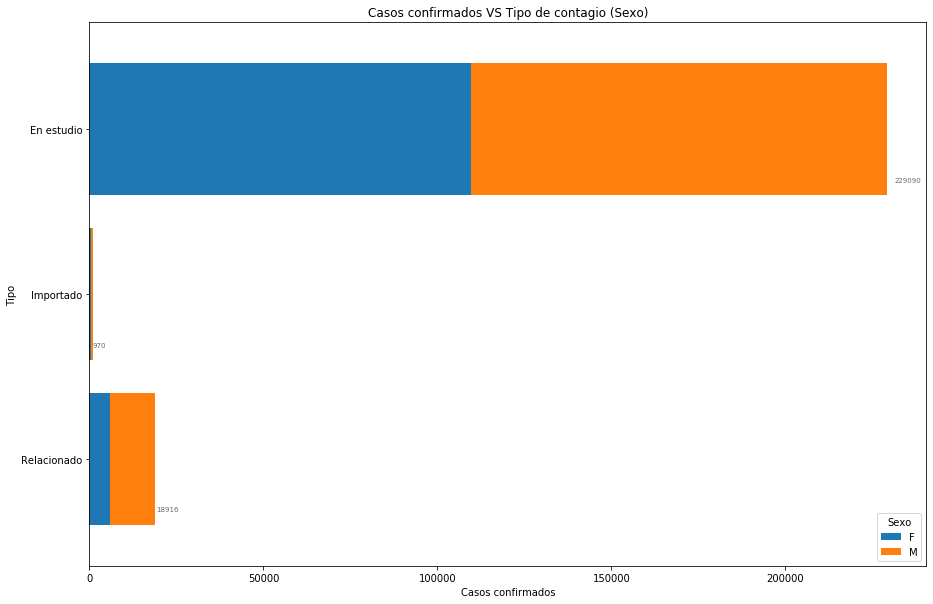

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               9506    16362    52015    52629    36436    29890   
Importado                   6       37      239      228      172      149   
Relacionado               848     2380     5239     4521     2460     1800   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               17394     9434     4596        828  
Importado                   94       35        9          1  
Relacionado                907      446      254         61

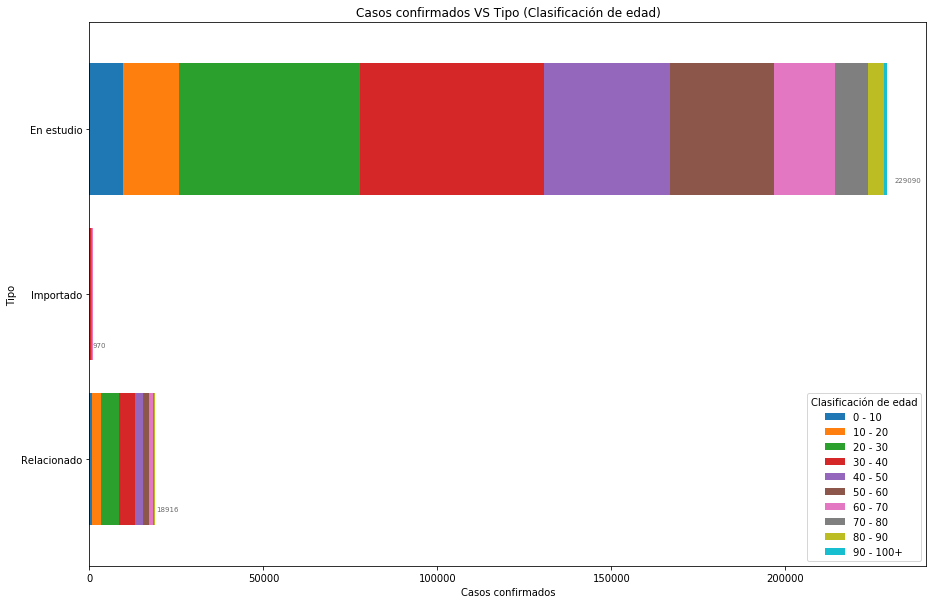

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  5154   5206
10 - 20                 8630  10149
20 - 30                27172  30321
30 - 40                26200  31178
40 - 50                18209  20859
50 - 60                14679  17160
60 - 70                 8424   9971
70 - 80                 4491   5424
80 - 90                 2382   2477
90 - 100+                517    373

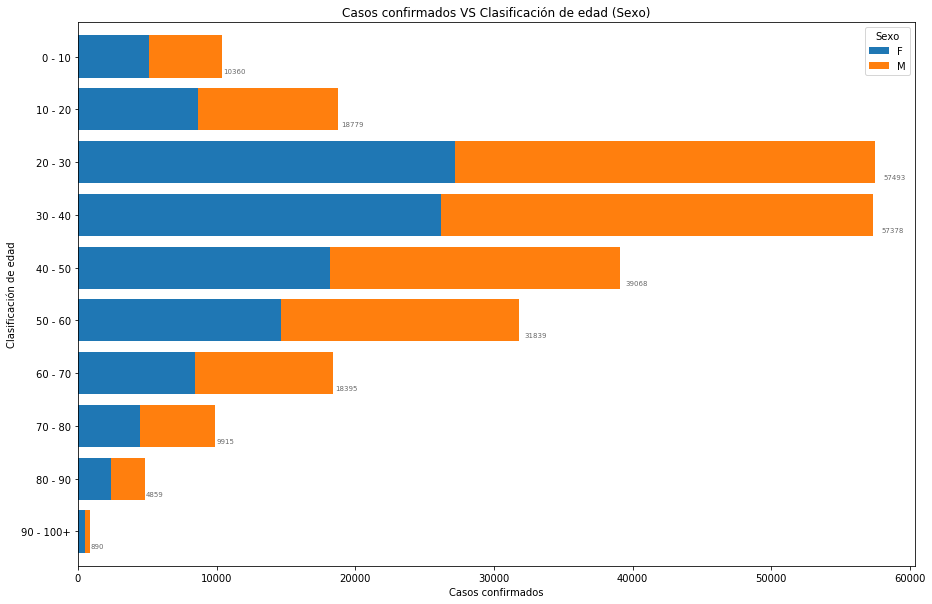

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3963         14       506            63   14   
10 - 20                 7661         18       287            27   10   
20 - 30                25101        126      1069            53   22   
30 - 40                24980        298      1686           166   21   
40 - 50                16400        693      2040           219   39   
50 - 60                12422       1301      2741           371   60   
60 - 70                 5955       1999      2396           351   94   
70 - 80                 2565       2138      1520           215  111   
80 - 90                 1053       1571       748            77   99   
90 - 100+                169        367       106             5   29   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       5800  
10 - 20                     10776  
20 - 30                     31122  
30 - 40                     30227  
40 - 50                     19677  
50 - 60                     14944  
60 - 70                      7600  
70 - 80                      3366  
80 - 90                      1311  
90 - 100+                     214

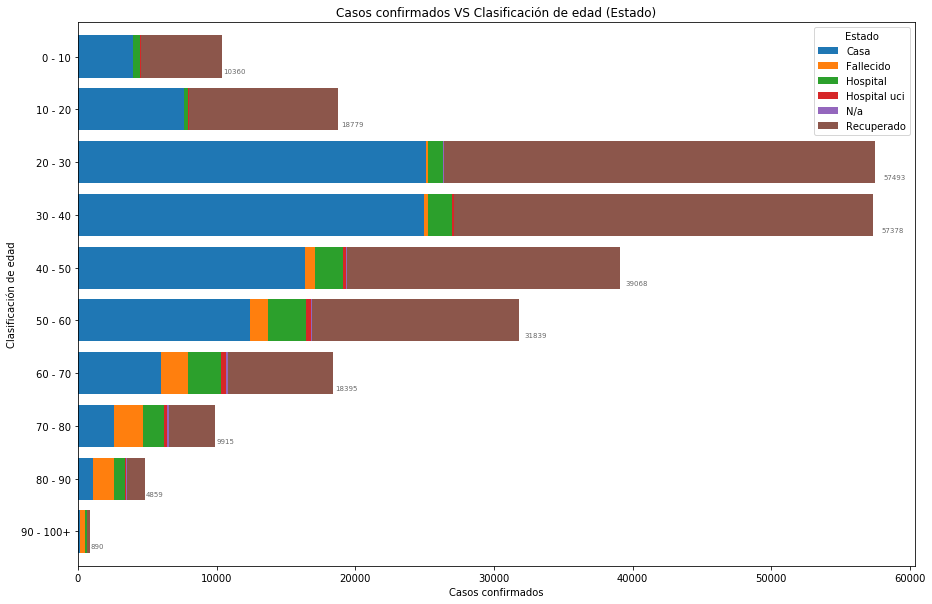

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-02-01               0.0     1.0
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
...                      ...     ...
2020-07-22            4797.0  5873.0
2020-07-23            2654.0  2933.0
2020-07-24            3038.0  3464.0
2020-07-25            2543.0  2423.0
2020-07-26             236.0   296.0

[141 rows x 2 columns]

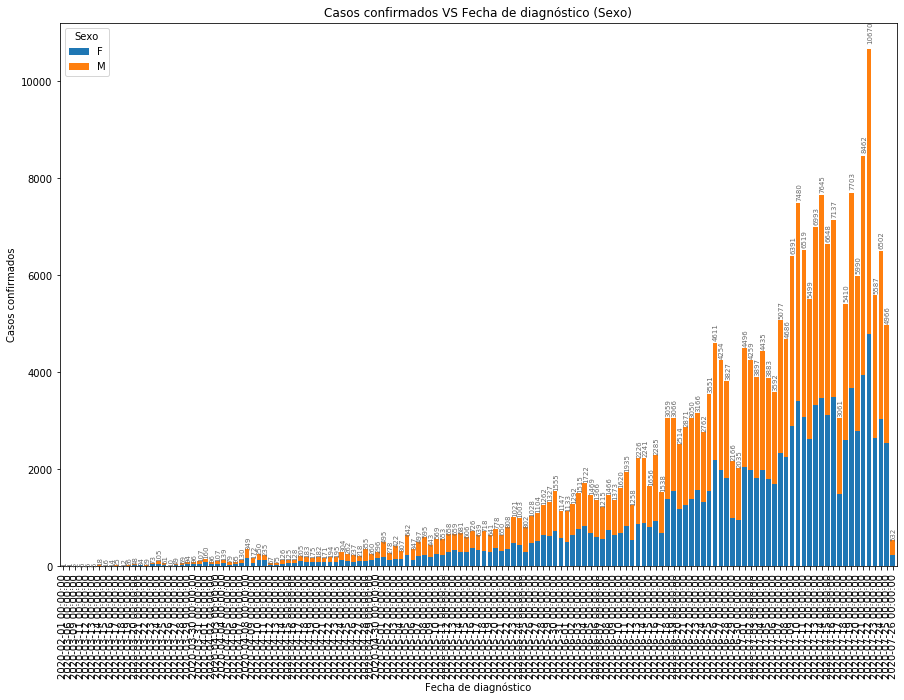

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-02-01                  0        0        1        0        0        0   
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
...                       ...      ...      ...      ...      ...      ...   
2020-07-22                371      789     2541     2425     1676     1431   
2020-07-23                196      370     1222     1277      897      750   
2020-07-24                214      458     1479     1597     1058      850   
2020-07-25                168      321     1114     1145      814      690   
2020-07-26                 35       34       99      119       90       79   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-02-01                   0        0        0          0  
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
...                        ...      ...      ...        ...  
2020-07-22                 795      413      195         34  
2020-07-23                 452      260      143         20  
2020-07-24                 462      268      102         14  
2020-07-25                 384      209      102         19  
2020-07-26                  26       25       21          4  

[141 rows x 10 columns]

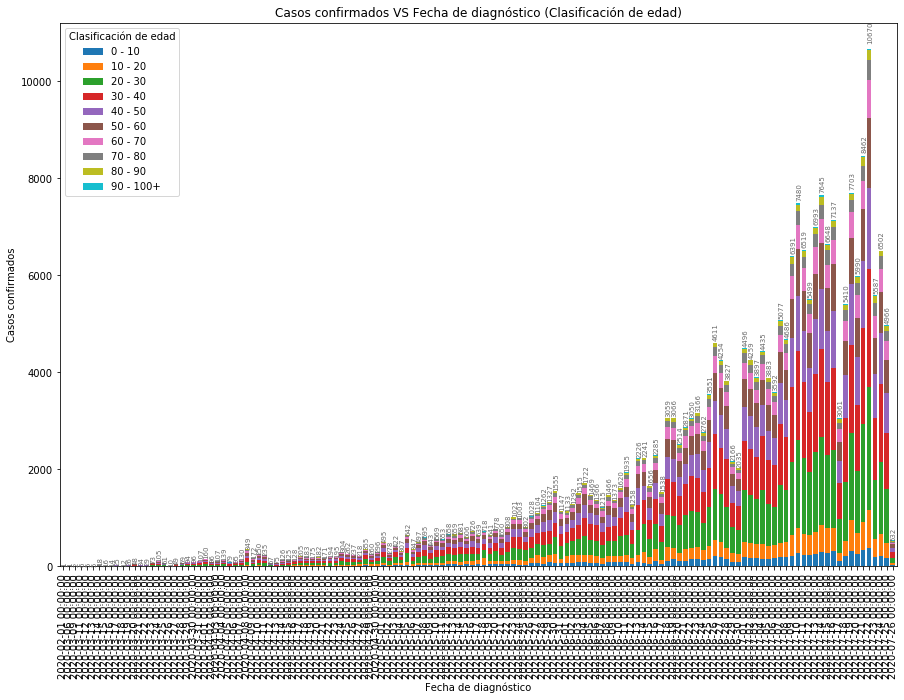

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci   N/a  \
Fecha de diagnóstico                                                    
2020-02-01               0.0        0.0       0.0           0.0   0.0   
2020-03-06               0.0        0.0       0.0           0.0   0.0   
2020-03-09               0.0        0.0       0.0           0.0   0.0   
2020-03-11               0.0        0.0       0.0           0.0   0.0   
2020-03-12               0.0        0.0       0.0           0.0   0.0   
...                      ...        ...       ...           ...   ...   
2020-07-22            9695.0      224.0     638.0          59.0  12.0   
2020-07-23            4897.0      142.0     498.0          40.0   9.0   
2020-07-24            5939.0       89.0     412.0          35.0   1.0   
2020-07-25            4421.0        3.0     482.0          43.0   0.0   
2020-07-26             476.0        0.0      49.0           6.0   0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-02-01                   1.0  
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
...                          ...  
2020-07-22                  42.0  
2020-07-23                   1.0  
2020-07-24                  26.0  
2020-07-25                  17.0  
2020-07-26                   1.0  

[141 rows x 6 columns]

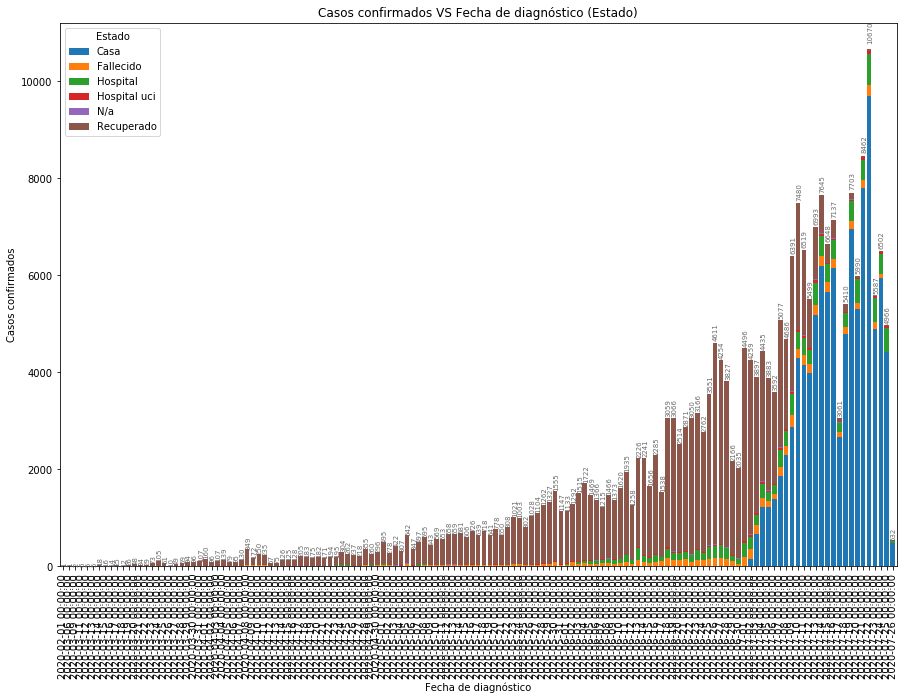

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-02-01                 0.0       1.0
2020-03-06                 1.0       1.0
2020-03-09                 2.0       2.0
2020-03-11                 6.0       4.0
2020-03-12                11.0       4.0
...                        ...       ...
2020-07-22            105608.0  122004.0
2020-07-23            108262.0  124937.0
2020-07-24            111300.0  128401.0
2020-07-25            113843.0  130824.0
2020-07-26            114079.0  131120.0

[141 rows x 2 columns]

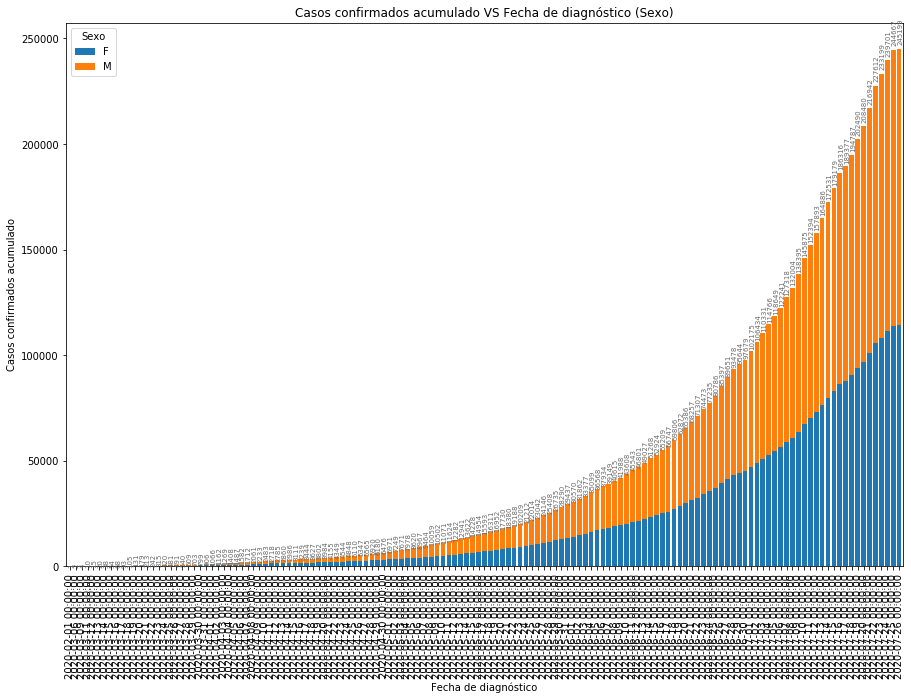

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-02-01                  0        0        1        0        0        0   
2020-03-06                  0        1        1        0        0        0   
2020-03-09                  0        1        1        1        1        0   
2020-03-11                  0        1        5        1        1        1   
2020-03-12                  0        1        5        2        2        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-22               9614    17321    52677    52332    35654    29009   
2020-07-23               9810    17691    53899    53609    36551    29759   
2020-07-24              10024    18149    55378    55206    37609    30609   
2020-07-25              10192    18470    56492    56351    38423    31299   
2020-07-26              10227    18504    56591    56470    38513    31378   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-02-01                   0        0        0          0  
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
...                        ...      ...      ...        ...  
2020-07-22               16780     8995     4407        823  
2020-07-23               17232     9255     4550        843  
2020-07-24               17694     9523     4652        857  
2020-07-25               18078     9732     4754        876  
2020-07-26               18104     9757     4775        880  

[141 rows x 10 columns]

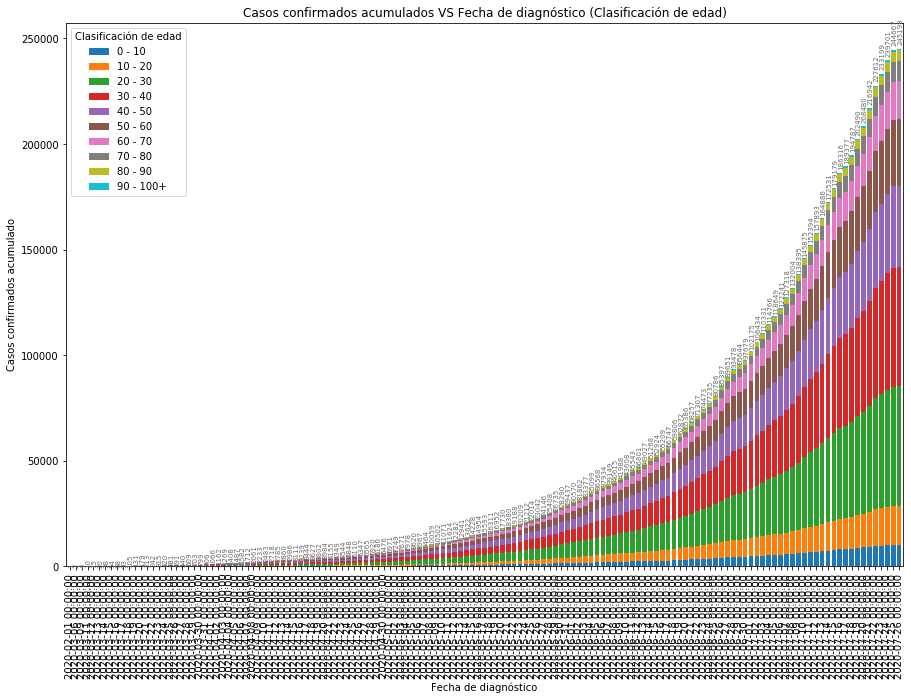

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-02-01                 0.0        0.0       0.0           0.0    0.0   
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-07-22             84481.0     8115.0   11510.0        1390.0  470.0   
2020-07-23             89378.0     8257.0   12008.0        1430.0  479.0   
2020-07-24             95317.0     8346.0   12420.0        1465.0  480.0   
2020-07-25             99738.0     8349.0   12902.0        1508.0  480.0   
2020-07-26            100214.0     8349.0   12951.0        1514.0  480.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-02-01                   1.0  
2020-03-06                   2.0  
2020-03-09                   4.0  
2020-03-11                  10.0  
2020-03-12                  15.0  
...                          ...  
2020-07-22              121646.0  
2020-07-23              121647.0  
2020-07-24              121673.0  
2020-07-25              121690.0  
2020-07-26              121691.0  

[141 rows x 6 columns]

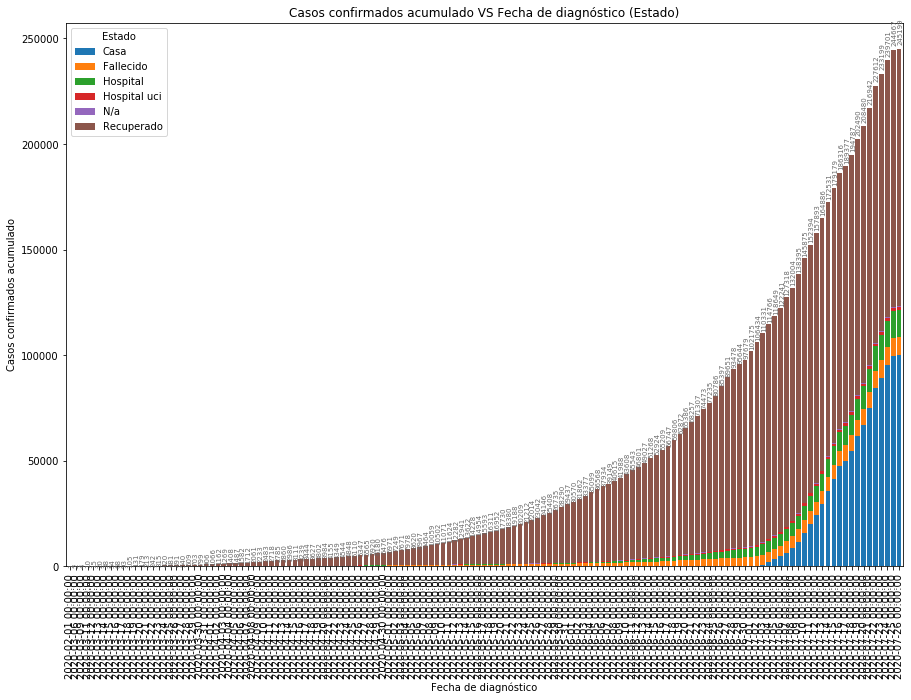

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>